# Binary Classification

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt 

## Loading Data

In [5]:
data = pd.read_csv('predictive_maintenance.csv')

In [6]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [8]:
data.shape

(10000, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [10]:
data.count()  

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Target                     10000
Failure Type               10000
dtype: int64

In [11]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

## Data Pre-Processing

In [12]:
data.nunique().sort_values()

Target                         2
Type                           3
Failure Type                   6
Process temperature [K]       82
Air temperature [K]           93
Tool wear [min]              246
Torque [Nm]                  577
Rotational speed [rpm]       941
UDI                        10000
Product ID                 10000
dtype: int64

In [13]:
print(data.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [14]:
data.duplicated().sum()

0

In [15]:
# Method For (Binary Classification) in the "Failure Type" row
def correct_Target(row):
    if row['Failure Type'] == 'No Failure':
        return 0
    else:
        return 1

# Apply to the 'Target' column
data['Target'] = data.apply(correct_Target, axis=1)

In [16]:
data.groupby(['Target','Failure Type']).count().drop(['UDI', 'Product ID', 'Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9652
1      Heat Dissipation Failure    112
       Overstrain Failure           78
       Power Failure                95
       Random Failures              18
       Tool Wear Failure            45

## Data Visualization

<Axes: xlabel='Target', ylabel='count'>

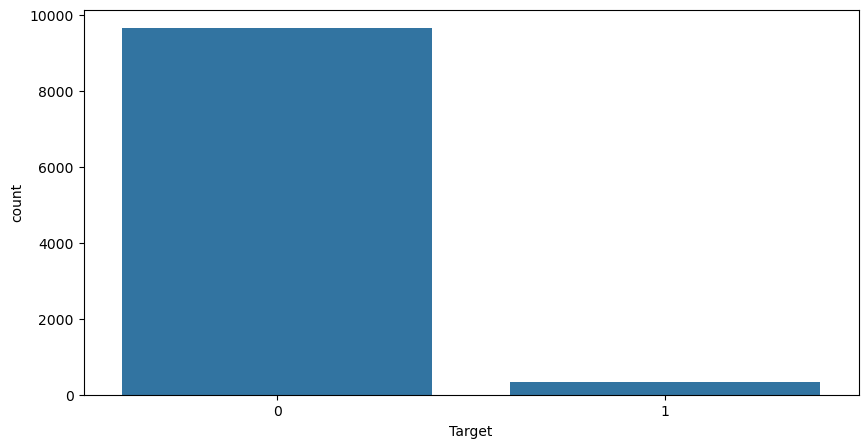

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x="Target")

## Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

# Separate feature
X = data.drop(columns=['Target', 'Failure Type'])
y_binary = data['Target']

In [19]:
# Encode Multi
label_encoder = LabelEncoder()

## Split

In [20]:
from sklearn.model_selection import train_test_split

#Binary
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42)

## Scaling

In [21]:
# Check for non-numeric columns for binary
non_numeric_columns = X_train_binary.select_dtypes(exclude=['number']).columns
non_numeric_columns = X_test_binary.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric (if they are categorical)
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to non-numeric columns
for col in non_numeric_columns:
    le = LabelEncoder()
    X_train_binary[col] = le.fit_transform(X_train_binary[col])
    X_test_binary[col] = le.fit_transform(X_test_binary[col])

In [22]:
from sklearn.preprocessing import StandardScaler

# Scaler for binary
scaler = StandardScaler()
X_train_binary_scaled = scaler.fit_transform(X_train_binary)
X_test_binary_scaled = scaler.transform(X_test_binary)

## Balance using Smote

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Apply SMOTE (Class imblanace)
smote = SMOTE(random_state=42)
X_train_binary_smote, y_train_binary_smote = smote.fit_resample(X_train_binary_scaled, y_train_binary)

In [24]:
print(y_train_binary_smote.value_counts())

Target
0    6749
1    6749
Name: count, dtype: int64


## Machine Learning Predictive Model

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic = LogisticRegression()


 --Logistic Regression for Binary Classification--

 Accuracy:	 0.9726666666666667

 Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2903
           1       0.70      0.27      0.39        97

    accuracy                           0.97      3000
   macro avg       0.84      0.63      0.69      3000
weighted avg       0.97      0.97      0.97      3000



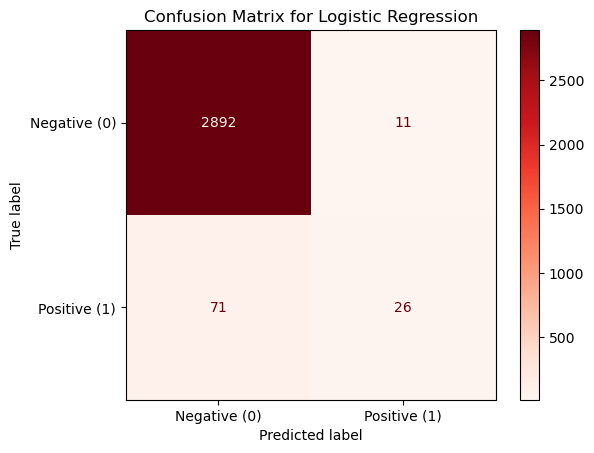

In [44]:
# Train the model for Binary Classification
logistic.fit(X_train_binary_scaled, y_train_binary) 
# Predict
y_pred_logistic = logistic.predict(X_test_binary_scaled) 

print("\n --Logistic Regression for Binary Classification--")

# Model Evaluation 
print("\n Accuracy:\t", accuracy_score(y_test_binary, y_pred_logistic))
print("\n Classification Report: \n", classification_report(y_test_binary, y_pred_logistic))

#Confusion Matrix
Confusion_Matrix_LR = confusion_matrix(y_test_binary, y_pred_logistic)
display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix_LR, display_labels = ["Negative (0)", "Positive (1)"])
display.plot(cmap = "Reds", values_format = "d")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

## Hyperparameter optimization

In [34]:
# Random Search 
from sklearn.model_selection import RandomizedSearchCV


param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

# Random search with cross-validation
random_search_logistic = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=500),
    param_distributions=param_distributions,
    n_iter=50, 
    cv=10,     
    random_state=42,
    n_jobs=-1   
)

In [35]:
# best_model_binary
LogisticRegression = random_search_logistic.fit(X_train_binary_scaled, y_train_binary)


 --Logistic Regression [RandomizedSearchCV] for Binary Classification--

 Accuracy:	 0.973

 Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2903
           1       0.86      0.20      0.32        97

    accuracy                           0.97      3000
   macro avg       0.92      0.60      0.65      3000
weighted avg       0.97      0.97      0.96      3000



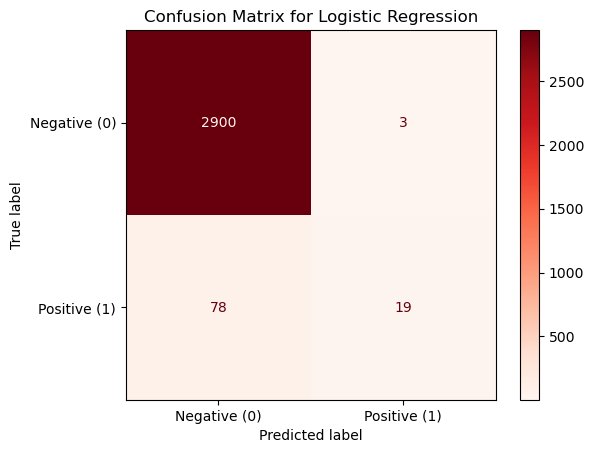

In [42]:
# best_estimator
best_model_binary = LogisticRegression

# Retrain the model for Binary Classification
best_model_binary.fit(X_train_binary_scaled, y_train_binary)
# Predict  
y_pred_best_model_binary = best_model_binary.predict(X_test_binary_scaled)

# Model Evaluation 
print("\n --Logistic Regression [RandomizedSearchCV] for Binary Classification--")

# Model Evaluation 
print("\n Accuracy:\t", accuracy_score(y_test_binary, y_pred_best_model_binary))
print("\n Classification Report: \n", classification_report(y_test_binary, y_pred_best_model_binary))

#Confusion Matrix
Confusion_Matrix_LR = confusion_matrix(y_test_binary, y_pred_best_model_binary)
display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix_LR, display_labels = ["Negative (0)", "Positive (1)"])
display.plot(cmap = "Reds", values_format = "d")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()